## Week 4
### More on regression (continued from last week)
#### Matrix multiplication method

In [3]:
import matplotlib.pyplot as py
import numpy as np
import matplotlib.pyplot as py

In [4]:
#***read in burned area file***
filename = "burnedarea.txt"
filedata  = np.loadtxt(filename, skiprows=1, delimiter =",")
years     = filedata[:,0]
areatotal = filedata[:,1]

nyears    = len(years)

Solve for the slope and intercept explicitly using matrices
w = (A.T * A)^-1 * (A.T * y)

In [11]:
ones = np.ones(nyears)
A = np.vstack((years, ones)).T #two columns: years and ones

In [12]:
p1 = np.dot(A.T, areatotal) #dot product
p2 = np.dot(A.T, A)
p3 = np.linalg.inv(p2)
w = np.dot(p3, p1)
print('Matrix multiplication solution: slope {:.2f} intercept {:.2f}'.format(w[0], w[1]))

Matrix multiplication solution: slope -7.36 intercept 15253.69


#### numpy polyfit method
The numpy.polyfit function fits a polynomial and returns the vector of coefficients that minimizes the squared error. To do linear regression, we would fit a first-degree polynomial and get the slope and intercept

In [15]:
wcoeff = np.polyfit(years, areatotal, 1) #The 1 specifies first-degree (linear, not quadratic or cubic, etc)

In [17]:
print(wcoeff)

[-7.36187297e+00  1.52536923e+04]


Text(0.5, 1.0, 'Global Fire Emissions Database Timeseries')

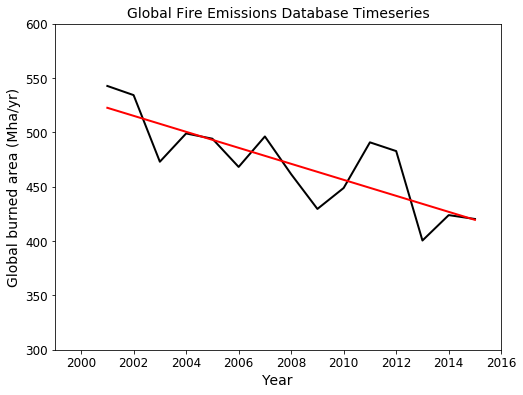

In [26]:
#plot 
fig = py.figure(figsize=(8,6)) # size is optional
my_font_size = 12
ax1 = fig.add_subplot(1,1,1) # (rows, cols, plot)
ax1.plot(years, areatotal, color="black", linewidth=2)

ypoly = wcoeff[0]*years + wcoeff[1]
ax1.plot(years, ypoly, color='red', linewidth=2)

ax1.set_ylim(300, 600)
ax1.set_xlim(1999, 2016)
ax1.set_ylabel("Global burned area (Mha/yr)", fontsize = my_font_size + 2)
ax1.set_xlabel("Year", fontsize = my_font_size+ 2)
ax1.tick_params(labelsize = my_font_size)
ax1.set_title("Global Fire Emissions Database Timeseries", fontsize = my_font_size +2)

We can also us np.polyfit to get a second-order polynomial (a quadratic fit). We will have 3 coefficients: one for the squared term, one for the linear term, and one for the intercept

In [23]:
w3coeff = np.polyfit(years, areatotal, 2)
ypoly2 = w3coeff[0]*years**2 + w3coeff[1]*years + w3coeff[2]

Text(0.5, 1.0, 'Global Fire Emissions Database Timeseries')

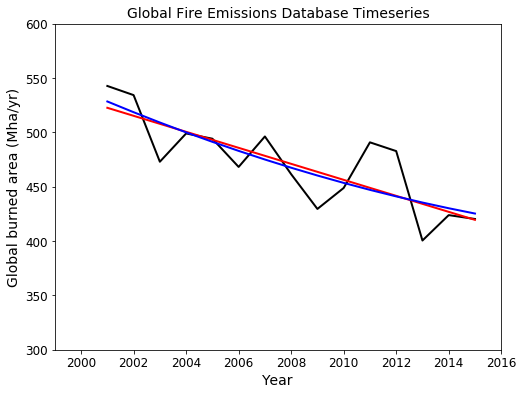

In [27]:
#plot 
fig = py.figure(figsize=(8,6)) # size is optional
my_font_size = 12
ax1 = fig.add_subplot(1,1,1) # (rows, cols, plot)
ax1.plot(years, areatotal, color="black", linewidth=2)

ypoly = wcoeff[0]*years + wcoeff[1]
ax1.plot(years, ypoly, color='red', linewidth=2)
ax1.plot(years, ypoly2, color='blue', linewidth=2)

ax1.set_ylim(300, 600)
ax1.set_xlim(1999, 2016)
ax1.set_ylabel("Global burned area (Mha/yr)", fontsize = my_font_size + 2)
ax1.set_xlabel("Year", fontsize = my_font_size+ 2)
ax1.tick_params(labelsize = my_font_size)
ax1.set_title("Global Fire Emissions Database Timeseries", fontsize = my_font_size +2)

The second-order polynomial (blue) doesn't add much information. A linear fit is sufficient